In [46]:
# Classification
import math
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D
from keras.layers import Dense
from keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses, regularizers
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve
import pandas as pd
import os

In [47]:
#Best performing architect

# CM: [39 2 4 29]
# Accuracy: 0.919
# Sensitivity: 0.879
# Specificity: 0.951
# MCC: 0.836

# def create_model():
#     # Create model
#     model = Sequential()
#     model.add(Conv1D(filters=32, kernel_size=14, strides=1, activation='relu', input_shape=[None,1], name = 'L1'))
#     model.add(tf.keras.layers.Dropout(0.2)),  # dropout rate of 0.2
#     model.add(Conv1D(filters=32, kernel_size=4, strides=1, activation='relu', name = 'L2'))  # New Conv1D layer
#     #model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu', name = 'L3'))  # New Conv1D layer
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid', name='classification'))
#     # Compile model
#     adam = tf.keras.optimizers.Adam(learning_rate=1.e-04)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     #model.summary()
#     return model

In [48]:
folds = 5

# Function to create model, required for KerasClassifier
def create_model():
    # Create model
    model = Sequential()
    model.add(Conv1D(filters=96, kernel_size=14, strides=1, activation='relu', input_shape=[None,1], name = 'L1'))
    model.add(tf.keras.layers.Dropout(0.4)),  # dropout rate of 0.2
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', input_shape=[None,1], name = 'L11'))
    model.add(tf.keras.layers.Dropout(0.4)),  # dropout rate of 0.2
    model.add(Conv1D(filters=64, kernel_size=4, strides=1, activation='relu', name = 'L2'))  # New Conv1D layer
    #model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu', name = 'L3'))  # New Conv1D layer
    model.add(GlobalAveragePooling1D())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid', name='classification'))
    # Compile model
    adam = tf.keras.optimizers.Adam(learning_rate=1.e-04)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model

In [49]:
# copy of Rahul's model
# def create_model():
#     # Create model
#     model = Sequential()
#     model.add(Conv1D(filters=14, kernel_size=10, strides=1, activation='relu', input_shape=[None,1]))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(1, activation='sigmoid', name='classification'))
#     # Compile model
#     adam = tf.keras.optimizers.Adam(lr=1.e-04)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     #model.summary()
#     return model

In [50]:
# Fix random seed for reproducibility
seed = 128
np.random.seed(seed)
# Split into input (X) and output (y) variables
dir = r'C:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\EEG_fNIRS_paper_Brain_informatics\channelEEG_codes_results_alphaBand\Results\Connectivities_LSTMED'
#csvfilename = 'EEG_GC_Exp_Nov_T123.csv'
#csvfilename = 'entireTrial_LSTMConnectivity2REA.csv'
csvfilename = 'exp_novST1.csv'
data = pd.read_csv(os.path.join(dir,csvfilename)).values
m,n = data.shape
X0 = data[:,0:n-1]
print(X0.shape)
X = X0.reshape(X0.shape[0],X0.shape[1],1)
print(X.shape)
y = data[:,n-1]
y = np.array([0 if y[i]==-1 else 1 for i in range(len(y))])
print(y)

(77, 20)
(77, 20, 1)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [51]:
classifier = create_model() #KerasClassifier(build_fn=create_model, epochs=2000, batch_size=5, verbose=0)
classifier.summary()

c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Conv1D)                     │ (None, None, 96)       │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, None, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L11 (Conv1D)                    │ (None, None, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Conv1D)                     │ (None, None, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_18     │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,497 (150.38 KB)

 Trainable params: 38,497 (150.38 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
y_true = []
y_pred = []
itest = []
kf = StratifiedKFold(n_splits=folds, shuffle=False)
#kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
for train, test in kf.split(X,y):
    x_train, x_test, y_train, y_test = X[train], X[test], y[train], y[test]

    classifier = create_model() #KerasClassifier(build_fn=create_model, epochs=2000, batch_size=5, verbose=0)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, batch_size=16, shuffle=True, verbose=0, callbacks=[es]) #, callbacks=[es]
    # Predicting the Test set results
    k_pred = classifier.predict(x_test)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, k_pred)
    itest = np.append(itest, test)

c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 62: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Epoch 81: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Epoch 74: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Epoch 51: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Epoch 62: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Best Threshold=0.141427, G-Mean=0.521


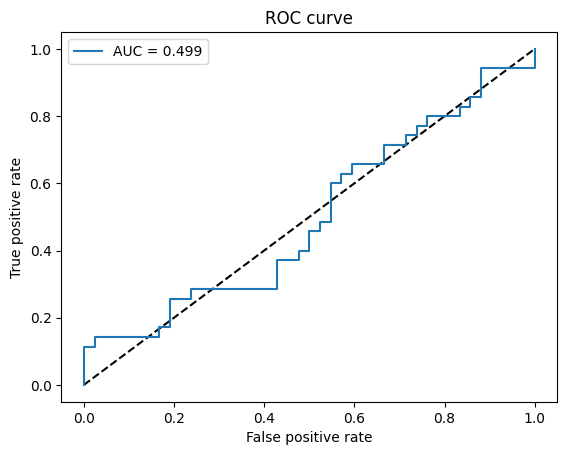

Best Threshold=0.008038, F-Score=0.629


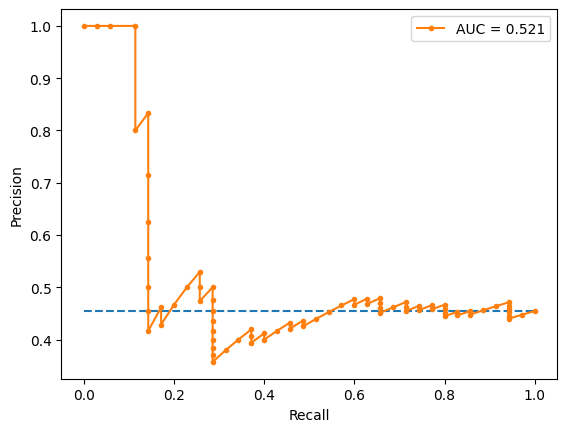

CM: [5 37 2 33]
Accuracy: 0.494
Sensitivity: 0.943
Specificity: 0.119
MCC: 0.107


In [53]:
# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
area = auc(fpr, tpr)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
area = auc(recall, precision)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
plt.figure()
no_skill = len(y_true[y_true==1]) / len(y_true)
plt.plot([0,1], [no_skill,no_skill], linestyle='--')
plt.plot(recall, precision, marker='.', label='AUC = {:.3f}'.format(area))
#plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# Making the Confusion Matrix [tn, fp, fn, tp]
tn, fp, fn, tp = confusion_matrix(y_true, (y_pred >= thresholds[ix])).ravel()
N = tn+fp+fn+tp
S = (tp+fn)/N
P = (tp+fp)/N
MCC = ((tp/N)-S*P)/np.sqrt(P*S*(1.-S)*(1.-P))
accuracy = (tp+tn)/(tn+fp+fn+tp)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)

print("CM: [%d %d %d %d]" %(tn, fp, fn, tp))
print("Accuracy: %0.3f" %(accuracy))
print("Sensitivity: %0.3f" %(sensitivity))
print("Specificity: %0.3f" %(specificity))
print("MCC: %0.3f" %(MCC))


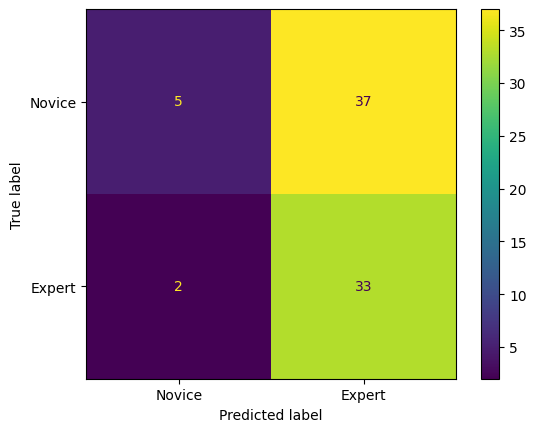

In [54]:
# from sklearn.metrics import plot_confusion_matrix, confusion_matrix
conf_matrix = [[tn, fp],
               [fn, tp]]
conf_matrix =confusion_matrix(y_true, (y_pred >= thresholds[ix]))
# Plot the confusion matrix
labels = ['Novice', 'Expert']
# plot_confusion_matrix(conf_matrix, display_labels=labels, cmap=plt.cm.Blues, normalize=None)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=labels)
disp.plot()
plt.show()